In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
# importing the threading module
import threading
import time

In [2]:
# Declaring the input color matrix.

data = np.empty((24, 3))
print(data.shape)

(24, 3)


In [3]:
# Shades of red:

#dark red
data[0][0] = 139
data[0][1] = 0
data[0][2] = 0

#crimson
data[1][0] = 220
data[1][1] = 20
data[1][2] = 60

#red
data[2][0] = 255
data[2][1] = 0
data[2][2] = 0

#salmon
data[3][0] = 250
data[3][1] = 128
data[3][2] = 114

#orange red
data[4][0] = 255
data[4][1] = 69
data[4][2] = 0



# Shades of Green

#green
data[5][0] = 0
data[5][1] = 128
data[5][2] = 0

#sea green
data[6][0] = 46
data[6][1] = 139
data[6][2] = 87

#lime
data[7][0] = 0
data[7][1] = 255
data[7][2] = 0

#dark green
data[8][0] = 0
data[8][1] = 100
data[8][2] = 0

#forest green
data[9][0] = 34
data[9][1] = 139
data[9][2] = 34


# Shades of blue:

#dark blue
data[10][0] = 0
data[10][1] = 0
data[10][2] = 139

#light sky blue
data[11][0] = 135
data[11][1] = 206
data[11][2] = 250

#blue
data[12][0] = 0
data[12][1] = 0
data[12][2] = 255

#dodger blue
data[13][0] = 30
data[13][1] = 144
data[13][2] = 255

#royal blue
data[14][0] = 65
data[14][1] = 105
data[14][2] = 225


# Shades of yellow:

#yellow
data[15][0] = 255
data[15][1] = 255
data[15][2] = 0

#gold
data[16][0] = 255
data[16][1] = 215
data[16][2] = 0

#golden rod
data[17][0] = 218
data[17][1] = 165
data[17][2] = 32


# Shades of teal:

#teal
data[18][0] = 0
data[18][1] = 128
data[18][2] = 128

#light cyan
data[19][0] = 224
data[19][1] = 255
data[19][2] = 255

#cyan
data[20][0] = 0
data[20][1] = 255
data[20][2] = 255


# Shades of pink:

#pink
data[21][0] = 255
data[21][1] = 192
data[21][2] = 203

#deep pink
data[22][0] = 255
data[22][1] = 20
data[22][2] = 147

#magenta / fuchsia
data[23][0] = 255
data[23][1] = 0
data[23][2] = 255

In [4]:
# Caliberating color values between 0 and 1.

data = data / 255

In [5]:
# Euclidean distance between two vectors.
def distance(x1, x2):
    return math.sqrt(sum([(a - b) ** 2 for a, b in zip(x1, x2)]))
#     return np.linalg.norm(x1 - x2)

In [6]:
# Finding the winning node based on the input.
def closest(color, our_map):
    min_d = 999999
    x = 0 
    y = 0
    
    for i in range(len(our_map)):
        for j in range(len(our_map)):
            d = distance(color, our_map[i][j])
            if d < min_d:
                min_d, x, y = d, i, j
    
    return [x, y]


In [7]:
# Function to periodically save the state of the network as an image.
def show(network, p, epoch):
    plt.imshow(network)
    plt.title("Map for Sigma0 = " + str(p) + "; at epoch " + str(epoch) + ".")
    name = "sigma" + str(p) + "-" + str(epoch) + ".png"
    plt.savefig("./plots/"+name, dpi = 300)

In [8]:
# Function to train the SOM.
# Function to train the SOM.
def train(sigma_0):
    
    ans = list()
    network = np.copy(som)
    for i in range(1, epochs + 1):
        tic = time.time()
        # To keep track of iterations since tqdm is not allowed.
        if i % 5 == 0:
            toc = time.time()
            print("Epoch: ")
            print(sigma_0, i)
            print(toc - tic)
            tic = toc
            
        # In each iteration, we update the map for all the input colors.
        for j in range(24):
            inp = data[j]
            
            # Finding the winning node and its distance.
            indices = closest(inp, network)
            val = distance(inp, indices)
            
            # Updating the radius for this iteration.
            rad = sigma_0 * math.exp(((-1) * (i)) / epochs)
            
            # Updating the learning rate for this iteration.
            learn_rate = alpha_0 * math.exp(((-1) * (i)) / epochs)
            
            # Updating the whole map for this particular input.
            for x1 in range(100):
                for y1 in range(100):
                    
                    # Calculating distance of this neuron from winning neuron.
                    dist_from_winning_node = distance([x1, y1], indices)
                    
                    # Calculating the influence of the winning neuron on this neuron.
                    influence = math.exp(-1 * (dist_from_winning_node ** 2) / (2 * (rad ** 2)))
                    
                    # Current weight of the neuron under consideration.
                    weight = network[x1][y1]
                    
                    # Updating the weight of the neuron under consideration.
                    network[x1][y1] = weight + (learn_rate * influence * (inp - weight))
                    
        
        if i == 20 or i == 40 or i == 100 or i == 1000:
            ans.append(network)
            show(network, sigma_0, i)
    
    
    return ans

Epoch: 
10 5
0.0
Epoch: 
10 10
0.0
Epoch: 
10 15
0.0
Epoch: 
10 20
0.0
Epoch: 
10 25
0.0
Epoch: 
10 30
0.0
Epoch: 
10 35
0.0
Epoch: 
10 40
0.0
Epoch: 
10 45
0.0
Epoch: 
10 50
0.0
Epoch: 
10 55
0.0
Epoch: 
10 60
0.0
Epoch: 
10 65
0.0
Epoch: 
10 70
0.0
Epoch: 
10 75
0.0
Epoch: 
10 80
0.0
Epoch: 
10 85
0.0
Epoch: 
10 90
0.0
Epoch: 
10 95
0.0
Epoch: 
10 100
0.0
Epoch: 
10 105
0.0
Epoch: 
10 110
0.0
Epoch: 
10 115
0.0
Epoch: 
10 120
0.0
Epoch: 
10 125
0.0
Epoch: 
10 130
0.0
Epoch: 
10 135
0.0009152889251708984
Epoch: 
10 140
0.0
Epoch: 
10 145
0.0
Epoch: 
10 150
0.0
Epoch: 
10 155
0.0
Epoch: 
10 160
0.0
Epoch: 
10 165
0.0
Epoch: 
10 170
0.0
Epoch: 
10 175
0.0
Epoch: 
10 180
0.0
Epoch: 
10 185
0.0
Epoch: 
10 190
0.0
Epoch: 
10 195
0.0
Epoch: 
10 200
0.0
Epoch: 
10 205
0.0
Epoch: 
10 210
0.0
Epoch: 
10 215
0.0
Epoch: 
10 220
0.0
Epoch: 
10 225
0.0
Epoch: 
10 230
0.0
Epoch: 
10 235
0.0
Epoch: 
10 240
0.0
Epoch: 
10 245
0.0
Epoch: 
10 250
0.0
Epoch: 
10 255
0.0
Epoch: 
10 260
0.0
Epoch: 
10 265

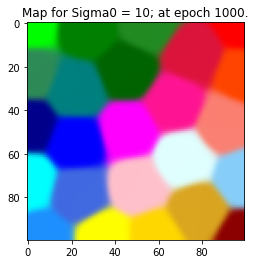

In [9]:
if __name__ == "__main__":
    
    epochs = 1000
    alpha_0 = 0.8

    # Initializing the Self Organizing Map (SOM).
    np.random.seed(55)
    som = np.random.random((100, 100, 3))

    train(10)
    
    # both threads completely executed
    print("Done!")